In [127]:
#load up modules

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
import datetime
import seaborn as sns

<center><font size="+2">Importing and inspecting the data</font></center>

In [2]:
#import data from csv into DF

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv', index_col='id')
test_for_sub = pd.read_csv('test.csv')

In [3]:
#checking for null values

train.isna().sum().sum()

0

In [40]:
#graphing out mean pixel values

pixel_mean = train.drop(columns = "label")
pixel_mean = pixel_mean.mean()

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Pixel Intensity')

Text(0.5, 0, 'Pixel')

Text(0, 0.5, 'Mean Intensity')

(0.0, 823.2)

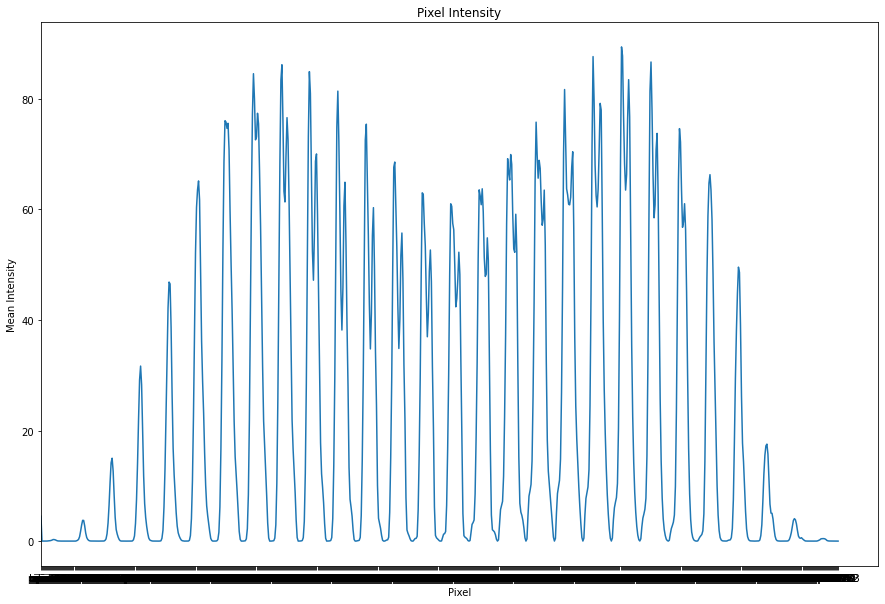

In [34]:
plt.figure(figsize=(15, 10))
plt.plot(pixel_mean)
plt.title('Pixel Intensity')
plt.xlabel('Pixel')
plt.ylabel('Mean Intensity')
plt.xlim(0,)
plt.show()

In [42]:
#Setting up heatmap to mimic the images

heatmap = np.asarray(pixel_mean).reshape(28,28)

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Pixel Intensity Heatmap')

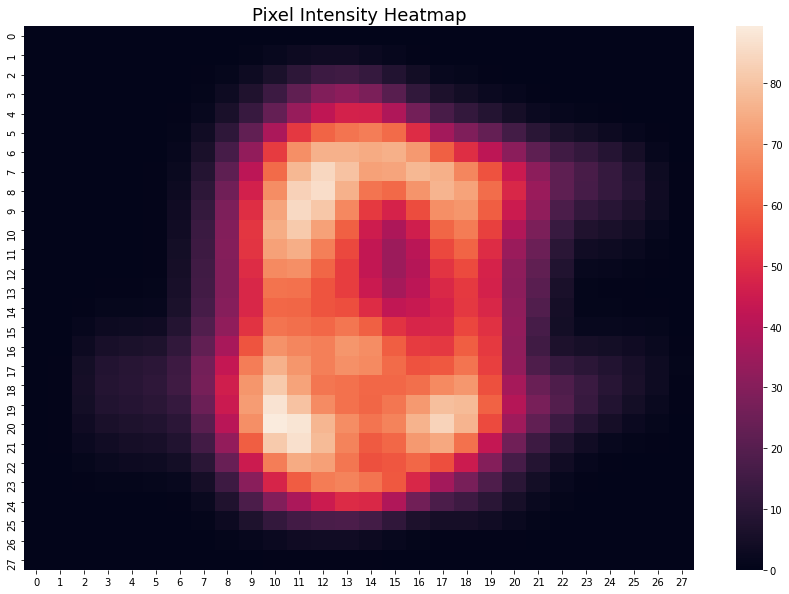

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(heatmap)
plt.title("Pixel Intensity Heatmap", fontsize=18)
plt.show()

In [4]:
#dropping columns where all the pixel info is 0 (empty space)

drop_col = train.sum() == 0
drop_col = drop_col[drop_col == True]
drop_col = pd.DataFrame(drop_col)
drop_cols = drop_col.index.values.tolist()

In [5]:
train_prep = train.drop(columns = drop_cols, axis=1)

In [6]:
train_prep

,label,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,...,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel782
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,6,0,0,0,0,0,0,0,147,49,...,0,0,0,0,0,0,0,0,0,0
59997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<center><font size="+2">Principle Component Analysis</font></center>

In [20]:
pca = PCA()
pca.fit(train_prep)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

PCA()

In [21]:
#checking 95 percentile cutoff

d

237

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'PCA Curve')

Text(0.5, 0, 'Dimensions')

Text(0, 0.5, 'Explained Variance')

(0.0, 1.0)

(0.0, 744.45)

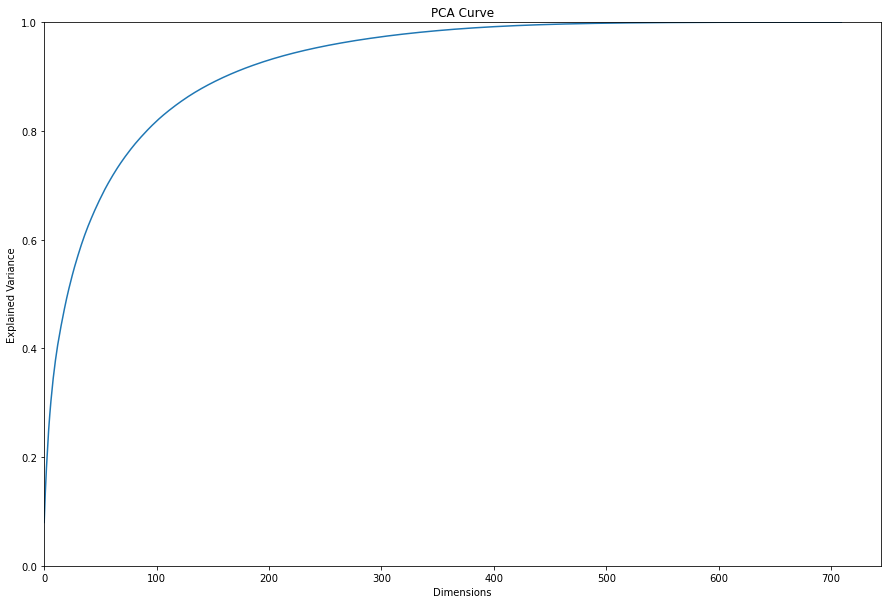

In [8]:
plt.figure(figsize=(15, 10))
plt.plot(cumsum)
plt.title('PCA Curve')
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.ylim(0,1)
plt.xlim(0,)
plt.show()

In [116]:
x = train_prep.drop(columns = "label")
y = train_prep['label']

In [10]:
#Dimensionality reduction to 95% explained variance and searching for best kernel

#clf = Pipeline([
#            ("kpca", KernelPCA(n_components=0.95)),
#            ("log_reg", LogisticRegression())
#    ])
#
#param_grid = [{
#        'kpca__kernel': ["rbf","sigmoid","linear"]
#}]
#
#grid_search = GridSearchCV(clf, param_grid, cv=3)
#grid_search.fit(x,y)

Z:\Python\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "Z:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "Z:\Python\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "Z:\Python\lib\site-packages\sklearn\pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "Z:\Python\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "Z:\Python\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "Z:\Python\lib\site-packages\sklearn\decomposition\_kernel_pca.py", line 305, in fit_trans

KeyboardInterrupt: 

In [13]:
x.shape
y.shape

#not sure why it isn't converging, going to attempt a reconstruction approach

(60000, 709)

(60000,)

In [ ]:
#rbf_pca = KernelPCA(n_components=0.95, kernel="rbf", fit_inverse_transform=True)
#sig_pca = KernelPCA(n_components=0.95, kernel="sigmoid", fit_inverse_transform=True)
#lin_pca = KernelPCA(n_components=0.95, kernel="linear", fit_inverse_transform=True)

#x_reduced_rbf = rbf_pca.fit_transform(x)
#x_reduced_sig = sig_pca.fit_transform(x)
#x_reduced_lin = lin_pca.fit_transform(x)

#x_preimage_rbf = rbf_pca.inverse_transform(x_reduced_rbf)
#x_preimage_sig = sig_pca.inverse_transform(x_reduced_sig)
#x_preimage_lin = lin_pca.inverse_transform(x_reduced_lin)

In [16]:
#rbf_pca = KernelPCA(n_components=0.95, kernel="rbf", fit_inverse_transform=True)
#sig_pca = KernelPCA(n_components=0.95, kernel="sigmoid", fit_inverse_transform=True)
#lin_pca = KernelPCA(n_components=0.95, kernel="linear", fit_inverse_transform=True)

In [59]:
#ran out of memory, using incremental PCA strategy and dropping unused columns from test

test_dropped = test.drop(columns = drop_cols, axis=1)

#test_x = test_dropped
#test_x['Group'] = 'Test'
#train_x = x
#train_x['Group'] = 'Train'

#test_x.shape
#train_x.shape

(5000, 710)

(60000, 710)

In [80]:
#full_set = pd.concat([test_x,train_x], axis=0)

#full_set_no_labels = full_set.drop(columns = 'Group', axis=1)
#full_set_labels = full_set['Group']

In [81]:
#full_set.shape
#full_set_no_labels.shape
#full_set_labels.shape

(65000, 710)

(65000, 709)

(65000,)

In [118]:
x.shape

(60000, 709)

In [125]:
n_batches=100
inc_pca = IncrementalPCA(n_components=237)
for X_batch in np.array_split(x, n_batches):
    inc_pca.partial_fit(X_batch)
    
x_reduced_train = inc_pca.transform(x)
x_reduced_test = inc_pca.transform(test_dropped)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

IncrementalPCA(n_components=237)

ValueError: could not convert string to float: 'Test'

In [120]:
x_reduced.shape

(60000, 237)

In [126]:
#full_set_labels_df = pd.DataFrame(full_set_labels)
x_reduced_train_df = pd.DataFrame(x_reduced_train)
x_reduced_test_df = pd.DataFrame(x_reduced_test)

#full_set_labels_df.shape
#x_reduced_df.shape

In [101]:
#type(full_set_labels)

pandas.core.series.Series

In [106]:
#full_set_labels_df.reset_index(drop=True, inplace=True)
#x_reduced_df.reset_index(drop=True, inplace=True)

In [107]:
#x_reduced_labels = pd.concat([full_set_labels_df, x_reduced_df], axis=1)

In [109]:
#x_reduced_train = x_reduced_labels[x_reduced_labels['Group'] == 'Train']
#x_reduced_test = x_reduced_labels[x_reduced_labels['Group'] == 'Test']

#x_reduced_train.shape
#x_reduced_test.shape

(60000, 238)

(5000, 238)

In [111]:
#x_reduced_train.drop(columns = 'Group', inplace=True)
#x_reduced_test.drop(columns = 'Group', inplace=True)

#x_reduced_train.shape
#x_reduced_test.shape

Z:\Python\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(60000, 237)

(5000, 237)

<center><font size="+2">Fitting Models</font></center>

In [135]:
#Random Forest on full training set

x2 = train.drop(columns = 'label')
y2 = train['label']

forest = RandomForestClassifier(n_estimators=10, max_features='sqrt', bootstrap=True)

start = datetime.datetime.now()

forest.fit(x2, y2)

end = datetime.datetime.now()

time = end - start

print("Total time: ", time)

RandomForestClassifier(max_features='sqrt', n_estimators=10)

Total time:  0:00:03.304848


In [54]:
forest_pred = forest.predict(test)

In [55]:
#forest prediction on full set to csv

df_forest_full = pd.DataFrame({
        'id':test_for_sub['id'],
        'label':forest_pred
         })

df_forest_full.to_csv('Full_Forest_Prediction.csv', index=False)

In [132]:
#Random Forest on PCA subset

x3 = x_reduced_train_df

start = datetime.datetime.now()

forest.fit(x3,y)

end = datetime.datetime.now()

time = end - start

print("Total time: ", time)

RandomForestClassifier(max_features='sqrt', n_estimators=10)

Total time:  0:00:09.554472


In [134]:
x3.shape
x2.shape


(60000, 237)

(60000, 784)

In [123]:
forest_pred = forest.predict(x_reduced_test)

In [124]:
#forest on PCA subset to csv

df_forest_pca = pd.DataFrame({
        'id':test_for_sub['id'],
        'label':forest_pred
         })

df_forest_pca.to_csv('PCA_Forest_Prediction.csv', index=False)

In [129]:
#k means prediction on PCA subset

k=10
kmeans = KMeans(n_clusters=k)

start = datetime.datetime.now()

kmeans.fit(x3,y)

end = datetime.datetime.now()

time = end - start

print("Total time: ", time)

KMeans(n_clusters=10)

Total time:  0:00:10.319127


In [130]:
kmeans_pred = kmeans.predict(x_reduced_test)

In [131]:
#kmeans on PCA subset to csv

df_kmeans_pca = pd.DataFrame({
        'id':test_for_sub['id'],
        'label':kmeans_pred
         })

df_forest_pca.to_csv('PCA_Kmeans_Prediction.csv', index=False)

In [136]:
x3

,0,1,2,3,4,5,6,7,8,9,...,227,228,229,230,231,232,233,234,235,236
0,-603.288091,-265.968618,29.543674,322.439001,297.643239,-124.934323,101.681397,-40.163190,-381.203228,189.133962,...,-8.572087,-2.589302,-14.350503,-0.113456,4.165147,-25.565430,-3.922569,12.951999,20.235449,11.607983
1,-298.508747,-97.545181,53.100248,549.043015,42.394973,313.900998,219.936118,244.036492,-253.375238,-261.307943,...,-1.952752,-37.064421,-18.967245,10.080563,38.129383,-5.471973,42.476686,-18.756730,-52.433945,22.568942
2,425.622428,646.149382,433.615278,152.566857,162.645595,-195.899139,-43.390339,-399.671091,-347.059643,129.364109,...,-17.963281,34.563806,52.242118,12.886773,1.500884,-15.978092,-78.360585,-27.718195,-53.848611,-66.168072
3,343.828882,100.668132,-415.923450,8.472795,-103.486236,-152.570111,97.504881,-270.097913,17.727118,-158.508145,...,-22.765626,16.530313,-39.714744,16.548138,-2.930542,-21.039328,-20.731097,-12.753511,-14.177159,-5.410429
4,96.056460,3.560961,-516.641808,-125.603204,22.229515,-80.808001,-69.478546,-86.860767,-158.591547,-180.550328,...,10.927866,-29.733983,-21.420807,-13.361829,2.800066,17.900405,17.280906,-10.188362,-30.412589,-22.979608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,210.914339,384.407526,741.317914,-144.942036,-227.956924,-1.580220,-337.751217,56.535544,338.246142,4.615958,...,-35.179074,-26.551359,-18.153802,51.698029,0.751103,-106.797228,-109.858555,31.089271,-95.818560,44.059051
59996,411.839387,45.667686,127.141495,205.792177,-377.401391,242.378832,-121.596672,-321.715647,-151.310883,-65.733464,...,13.255111,16.134512,-34.101463,-17.616012,6.176108,3.213492,45.243811,8.165051,42.077729,2.152868
59997,568.863873,5.944893,470.638635,351.486257,-287.220897,116.241610,-75.654942,-223.176622,-149.750088,164.309465,...,0.962465,26.132990,-47.559436,-56.560078,17.494014,31.169902,-4.813065,-11.443178,2.590258,18.159107
59998,-771.741368,-105.778270,296.495076,-460.845396,-471.923913,82.696687,108.216859,-84.278278,-72.103981,-89.836260,...,48.659489,-11.337822,14.891255,-56.111808,-16.972903,12.211604,-34.704142,0.352692,-16.458978,-40.055747
